In [361]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates



In [362]:
df = pd.read_excel('Assignment_Dataset.xlsx')

In [363]:
df.head()

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


In [364]:
df.isna().sum()

Date    0
GHI     0
PR      0
dtype: int64

In [365]:
df['Date'] = pd.to_datetime(df['Date'])

def convert_date_format(date):
    return date.strftime("%Y-%B-%d")

df['Date'] = df['Date'].apply(convert_date_format)

print(df)

              Date       GHI         PR
0     2019-July-01  3.256608  69.575676
1     2019-July-02  3.976767  79.314411
2     2019-July-03  2.811867  61.020006
3     2019-July-04  3.658408  83.262576
4     2019-July-05  5.590683  82.124440
..             ...       ...        ...
977  2022-March-20  4.226183  81.632738
978  2022-March-21  3.431675  71.057353
979  2022-March-22  3.580492  81.631509
980  2022-March-23  4.997617  71.906149
981  2022-March-24  5.125050  79.911798

[982 rows x 3 columns]


In [366]:
df.head()

,Date,GHI,PR
0,2019-July-01,3.256608,69.575676
1,2019-July-02,3.976767,79.314411
2,2019-July-03,2.811867,61.020006
3,2019-July-04,3.658408,83.262576
4,2019-July-05,5.590683,82.124440


In [367]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%B-%d')

# Calculate 30-day moving average of PR
df['MA_30'] = df['PR'].rolling(window=30, min_periods=1).mean()

# Determine color coding for scatter points based on GHI values
colors = np.where(df['GHI'] < 2, 'navy',
                  np.where((df['GHI'] >= 2) & (df['GHI'] < 4), 'lightblue',
                           np.where((df['GHI'] >= 4) & (df['GHI'] < 6), 'orange', 'brown')))
# Find the earliest date in the dataset
start_date = df['Date'].min()

# Calculate the number of years elapsed for each data point
df['YearsElapsed'] = (df['Date'] - start_date).dt.days / 365
df['YearsElapsed'] = np.floor(df['YearsElapsed'])
# Calculate the budget based on the dynamic reduction
df['Budget'] = 73.9 - 0.6 * df['YearsElapsed']

# Find start date and end date
start_date = df['Date'].min().strftime('%Y-%m-%d')
end_date = df['Date'].max().strftime('%Y-%m-%d')


In [368]:
# Format the date to "SEP/19"
df['Date'] = df['Date'].dt.strftime('%d/%b/%y')

In [369]:
# Calculate the number of points above target PR budget
above_budget_count = df[df['PR'] > df['Budget']].shape[0]

# Calculate the total number of points
total_points = df.shape[0]

# Calculate the percentage of points above target PR budget
percentage_above_budget = round((above_budget_count / total_points) * 100,2)


In [372]:
df

,Date,GHI,PR,MA_30,YearsElapsed,Budget
0,01/Jul/19,3.256608,69.575676,69.575676,0.0,73.9
1,02/Jul/19,3.976767,79.314411,74.445044,0.0,73.9
2,03/Jul/19,2.811867,61.020006,69.970031,0.0,73.9
3,04/Jul/19,3.658408,83.262576,73.293167,0.0,73.9
4,05/Jul/19,5.590683,82.124440,75.059422,0.0,73.9
...,...,...,...,...,...,...
977,20/Mar/22,4.226183,81.632738,71.181262,2.0,72.7
978,21/Mar/22,3.431675,71.057353,70.789540,2.0,72.7
979,22/Mar/22,3.580492,81.631509,71.231840,2.0,72.7
980,23/Mar/22,4.997617,71.906149,71.249772,2.0,72.7


In [370]:
# Calculate the average of daily PR for different time periods
last_7_days_avg = df['PR'].tail(7).mean()
last_30_days_avg = df['PR'].tail(30).mean()
last_60_days_avg = df['PR'].tail(60).mean()
last_90_days_avg = df['PR'].tail(90).mean()
last_365_days_avg = df['PR'].tail(365).mean()
lifetime_avg = df['PR'].mean()

# Create a text box to display the average values
avg_text = f'Last 7 days avg PR: {last_7_days_avg:.2f}\n\n' \
           f'Last 30 days avg PR: {last_30_days_avg:.2f}\n\n' \
           f'Last 60 days avg PR: {last_60_days_avg:.2f}\n\n' \
           f'Last 90 days avg PR: {last_90_days_avg:.2f}\n\n' \
           f'Last 365 days avg PR: {last_365_days_avg:.2f}\n\n' \
           f'Lifetime avg PR: {lifetime_avg:.2f}'


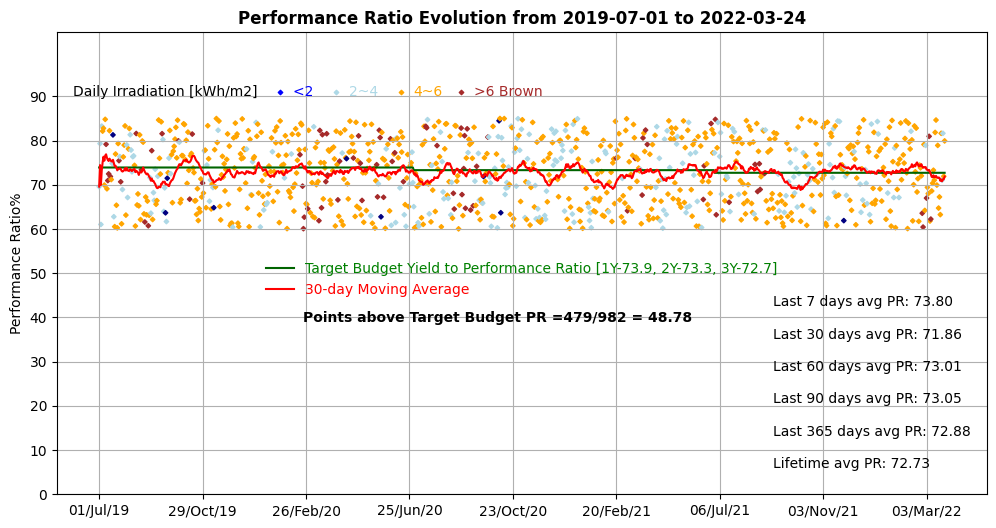

In [371]:
# Plot
plt.figure(figsize=(12, 6))

# Scatter plot with color coding
plt.scatter(df['Date'], df['PR'], c=colors, marker='D', s=5)

# Plot
plt.plot(df['Date'], df['Budget'], color='darkgreen', label='Target Budget Yield to Performance Ratio [1Y-73.9, 2Y-73.3, 3Y-72.7]')

# Moving average line
plt.plot(df['Date'], df['MA_30'], color='red', label='30-day Moving Average')


# Set y-axis limits to start from 0
plt.ylim(0, (max(df['PR']) + 10) * 1.1)
plt.yticks(np.arange(0, max(df['PR']) + 11, 10))

x_ticks = df['Date'].iloc[::120]  # Selecting every 4th month (120 days)
plt.xticks(x_ticks)

#Add kWh/m2 Annotation
plt.text(-30, max(df['PR'])+5, 'Daily Irradiation [kWh/m2]', fontsize=10)

# Annotate < 2: Navy Blue
plt.text(225, max(df['PR'])+5, '<2 ', fontsize=10, color='blue')
plt.scatter(210, max(df['PR'])+6, color='blue', marker='D', s=5)

# Annotate 2-4: Light Blue
plt.text(290, max(df['PR'])+5, '2~4', color='lightblue', fontsize=10)
plt.scatter(275, max(df['PR'])+6, color='lightblue', marker='D', s=5)

# Annotate 4-6: Orange
plt.text(365, max(df['PR'])+5, '4~6', color='orange', fontsize=10)
plt.scatter(350, max(df['PR'])+6, color='orange', marker='D', s=5)

# Annotate > 6: Brown
plt.text(435, max(df['PR'])+5, '>6 Brown', color='brown', fontsize=10)
plt.scatter(420, max(df['PR'])+6, color='brown', marker='D', s=5)

# Annotate target budget yield to performance ratio
plt.text(465, 39, f'Points above Target Budget PR ={above_budget_count}/{total_points} = {percentage_above_budget} ', color='black', fontsize=10, ha='center',fontweight='bold')

# Add legend
plt.legend(framealpha=0,loc=8,bbox_to_anchor=(0.5, 0.4),labelcolor=['green', 'red'])

# Add title and labels
plt.title('Performance Ratio Evolution from ' + start_date + ' to ' + end_date, fontsize=12, fontweight='bold')

#plot Average Pr
plt.text(0.77, 0.05, avg_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom')

plt.ylabel('Performance Ratio%')

# Add grid
plt.grid(True)

# Show the plot
plt.show()